<a href="https://colab.research.google.com/github/KhudV/MML/blob/main/Lab2_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 2


### Дисциплина: Методы машинного обучения



##### Студент:  Худицкий Василий
##### Группа:   НКНбд-01-19

## Москва 2022
***

### Вариант №28

1. Набор данных: forest_fires

2. Независимая переменная: features/RH

3. Зависимая переменная: features/temp

4. Визуализация для независимой переменной – эмпирическая плотность распределения

5. Визуализация для зависимой переменной – столбчатая диаграмма

6. Показатель качества регрессии – MSE (mean squared error)

**Решение**

1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets.

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ds = tfds.load("forest_fires", split = 'train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/forest_fires/0.0.1.incompleteE0U5HZ/forest_fires-train.tfrecord


  0%|          | 0/517 [00:00<?, ? examples/s]

Dataset forest_fires downloaded and prepared to /root/tensorflow_datasets/forest_fires/0.0.1. Subsequent calls will reuse this data.


In [ ]:
df = tfds.as_dataframe(ds)
df.head()

,area,features/DC,features/DMC,features/FFMC,features/ISI,features/RH,features/X,features/Y,features/day,features/month,features/rain,features/temp,features/wind
0,10.820000,671.200012,181.100006,96.099998,14.300000,63.0,7,5,1,7,6.4,27.299999,4.9
1,24.590000,750.500000,96.699997,90.500000,11.400000,55.0,3,4,6,8,0.0,20.600000,5.4
2,0.170000,607.099976,131.699997,94.300003,22.700001,55.0,6,5,1,7,0.0,19.400000,4.0
3,14.680000,671.200012,181.100006,96.099998,14.300000,27.0,3,4,1,7,0.0,32.299999,2.2
4,88.489998,699.599976,133.300003,92.900002,9.200000,21.0,4,4,2,8,0.0,26.400000,4.5


2. Выполните визуализацию независимой и зависимой переменных в соответствии с индивидуальным заданием, подписывая оси и рисунок.

In [ ]:
x = df['features/RH']
y = df['features/temp']
x.shape, y.shape

((517,), (517,))

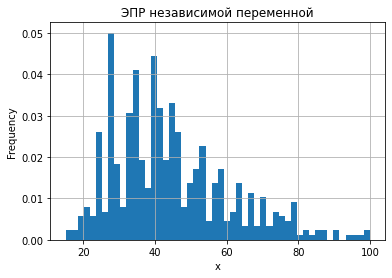

In [ ]:
plt.title("ЭПР независимой переменной")
plt.xlabel("x") # ось абсцисс
plt.ylabel("Frequency") # ось ординат
plt.grid(True)  # включение отображение сетки
n, bins, patches = plt.hist(x, 50, density=True)  # построение графика

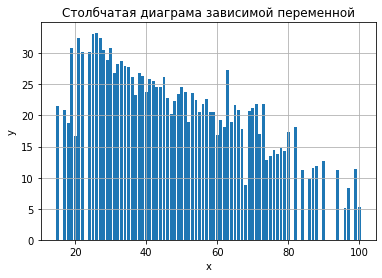

In [ ]:
plt.title("Столбчатая диаграма зависимой переменной")
plt.xlabel("x") # ось абсцисс
plt.ylabel("y") # ось ординат
plt.grid(True)  # включение отображение сетки
bar = plt.bar(x, y)  # построение графика

3. Постройте парную линейную регрессию для независимой и зависимой переменных при помощи точного подхода и при помощи нейронной сети с одним нейроном. Вычислите и сравните значения показателей качества R^2 двух подходов.

Точный подход:

In [ ]:
class SimpleLinReg:

    def __init__(self):
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        assert x_train.ndim == 1, \
            "В данных должен быть один признак"
        assert len(x_train) == len(y_train), \
            "Данные должны иметь одинаковый размер"

        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)

        self.a_ = (x_train - x_mean).dot(y_train - y_mean) / \
                  (x_train - x_mean).dot(x_train - x_mean)
        self.b_ = y_mean - self.a_ * x_mean

        return self

    def predict(self, x_predict):
        assert x_predict.ndim == 1, \
            "В данных должен быть один признак"
        assert self.a_ is not None and self.b_ is not None, \
            "Модель вначале должна быть обучена"

        return np.array([self._predict(x) for x in x_predict])

    def _predict(self, x_single):
        return self.a_ * x_single + self.b_

    def __repr__(self):
        return "SimpleLinearReg()"

In [ ]:
x.shape, y.shape

((517,), (517,))

In [ ]:
reg1 = SimpleLinReg()
reg1.fit(x, y)
y_predict = reg1.predict(x)

R^2 для точного подхода:

In [ ]:
mse_test = np.sum((y_predict - y)**2) / len(y)
1 - mse_test/np.var(y)

0.2781407075201682

Нейронная сеть с одним нейроном:

In [ ]:
model = tf.keras.Sequential( [ tf.keras.layers.Dense(1, input_shape=(1,)) ] )
model.compile(
    loss=tf.keras.losses.mean_squared_error,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.25),
    metrics=['mean_squared_error']
)
model.fit(x, y, epochs=100, verbose=0)
y_predict2 = model.predict(x)

In [ ]:
y_predict2.shape

(517, 1)

In [ ]:
y_predict2 = y_predict2.reshape((517,))
y_predict2.shape

(517,)

R^2 для нейросети:

In [ ]:
mse_test2 = np.sum((y_predict2 - y)**2) / len(y)
1 - mse_test2/np.var(y)

0.24588843243124414

4. Постройте диаграмму рассеяния для независимого и зависимого признаков и изобразите линии двух построенных парных регрессий, подписывая оси и рисунок и создавая легенду.

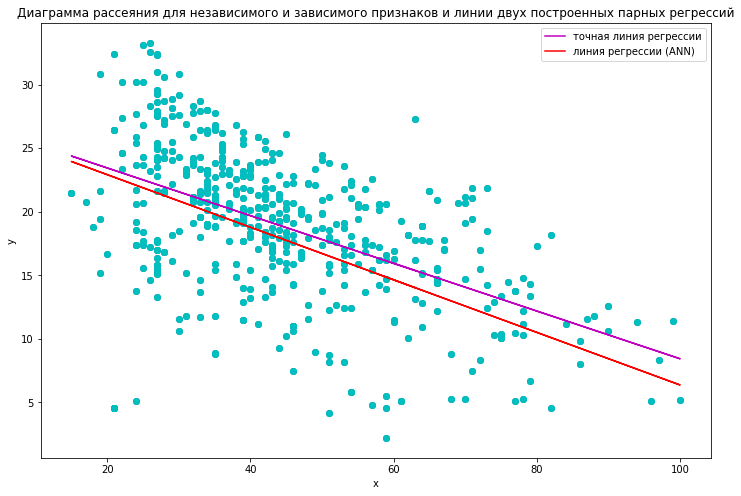

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(x, y)
plt.scatter(x, y, c='c')
plt.title("Диаграмма рассеяния для независимого и зависимого признаков и линии двух построенных парных регрессий")
plt.xlabel("x") # ось абсцисс
plt.ylabel("y") # ось ординат
plt.plot(x, y_predict, c='m', label='точная линия регрессии')
plt.plot(x, y_predict2, c='r', label='линия регрессии (ANN)')
plt.legend();

5. Разбейте набор признаков на обучающую и контрольную выборки. Создайте и адаптируйте на обучающей выборке нормализующий слой Tensorflow для всех признаков набора данных (за исключением зависимого признака).

In [ ]:
def train_test_split(X, y, test_ratio=0.2, seed=None):
    """returns X_train, X_test, y_train, y_test"""
    assert X.shape[0] == y.shape[0], \
        "Размер X должен быть равен размеру y"
    assert 0.0 <= test_ratio <= 1.0, \
        "Неверное значение test_ratio"

    if seed:
        np.random.seed(seed)

    shuffled_indexes = np.random.permutation(len(X))
    test_size = int(len(X) * test_ratio)

    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]

    return X_train, X_test, y_train, y_test

In [ ]:
X = np.array(df[['area',	'features/DC',	'features/DMC',	'features/FFMC',	'features/ISI',	'features/RH',	'features/X',	'features/Y',	'features/day',	'features/month',	'features/rain',	'features/wind']])
y = np.array(df['features/temp'])
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X_train)

6. Используя созданный нормализующий слой, постройте и обучите на обучающей выборке регресоры на базе следующих моделей множественной регрессии:

*    линейной регрессии
*    гребневой регрессии (L2)
*    лассо регрессии (L1)



In [ ]:
l1_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1,
                          kernel_regularizer=tf.keras.regularizers.L1(l1=0.01))
])
l1_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
    loss='mean_squared_error')

In [ ]:
history = l1_model.fit(
    X_train, y_train,
    epochs=100,
    # подавляем вывод
    verbose=0,
    # проверка (валидация) на 20% обучающих данных
    validation_split = 0.2)

In [ ]:
l2_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1,
                          kernel_regularizer=tf.keras.regularizers.L2(l2=0.01))
])
l2_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
    loss='mean_squared_error')

In [ ]:
history2 = l2_model.fit(
    X_train, y_train,
    epochs=100,
    # подавляем вывод
    verbose=0,
    # проверка (валидация) на 20% обучающих данных
    validation_split = 0.2)

In [ ]:
lr_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1)
])
lr_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
    loss='mean_squared_error')

In [ ]:
history3 = lr_model.fit(
    X_train, y_train,
    epochs=100,
    # подавляем вывод
    verbose=0,
    # проверка (валидация) на 20% обучающих данных
    validation_split = 0.2)

7. Определите на контрольной выборке модель множественной регрессии с наиболее высоким качеством по показателю, указанному в индивидуальном задании, среди построенных моделей.

In [ ]:
y_pr1 = l1_model.predict(X_test)
mse_test1 = np.sum((y_pr1 - y_test)**2) / len(y_test)
y_pr2 = l2_model.predict(X_test)
mse_test2 = np.sum((y_pr2 - y_test)**2) / len(y_test)
y_pr3 = lr_model.predict(X_test)
mse_test3 = np.sum((y_pr3 - y_test)**2) / len(y_test)
mse_test1, mse_test2, mse_test3

(5214.218446601942, 4811.043689320389, 5393.203883495145)

8. Для лучшего регрессора визуализируйте кривые обучения (в зависимости от эпохи обучения).

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, max(history.history['loss'])*0.5])
  plt.xlabel('Эпохи обучения')
  plt.ylabel('Ошибка')
  plt.legend()
  plt.grid(True)

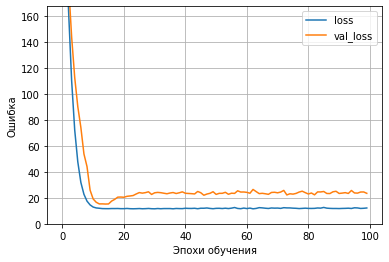

In [ ]:
plot_loss(history3)

9. Определите медианные значения признаков (кроме независимого и зависимого признаков) и для построенных медианных значений визуализируйте на плоскости с независимым признаком в качестве оси абсцисс и зависимым признаком в качестве оси ординат точки тестовой выборки и линии (графики) различных моделей множественной регрессии разными цветами. Подпишите оси и создайте легенду и заголовок для рисунка.

In [ ]:
X_m =  X_test
means = np.array(df[['area',	'features/DC',	'features/DMC',	'features/FFMC',	'features/ISI',	'features/X',	'features/Y',	'features/day',	'features/month',	'features/rain',	'features/wind']].mean())
for i in range(12):
  if i <5:
    X_m[:, i] = means[i]
  if i>5:
    X_m[:, i] = means[i-1]
X_m

array([[1.28472939e+01, 5.47939819e+02, 1.10872345e+02, ...,
        6.47582205e+00, 2.16634423e-02, 4.01760101e+00],
       [1.28472939e+01, 5.47939819e+02, 1.10872345e+02, ...,
        6.47582205e+00, 2.16634423e-02, 4.01760101e+00],
       [1.28472939e+01, 5.47939819e+02, 1.10872345e+02, ...,
        6.47582205e+00, 2.16634423e-02, 4.01760101e+00],
       ...,
       [1.28472939e+01, 5.47939819e+02, 1.10872345e+02, ...,
        6.47582205e+00, 2.16634423e-02, 4.01760101e+00],
       [1.28472939e+01, 5.47939819e+02, 1.10872345e+02, ...,
        6.47582205e+00, 2.16634423e-02, 4.01760101e+00],
       [1.28472939e+01, 5.47939819e+02, 1.10872345e+02, ...,
        6.47582205e+00, 2.16634423e-02, 4.01760101e+00]])

In [ ]:
y_pred1 = l1_model.predict(X_m)
y_pred2 = l2_model.predict(X_m)
y_pred3 = lr_model.predict(X_m)

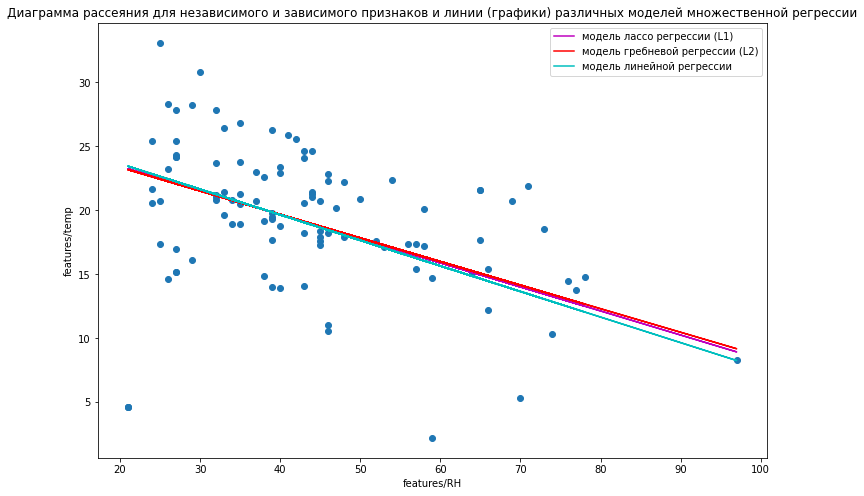

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X_test[:,5], y_test)
plt.title("Диаграмма рассеяния для независимого и зависимого признаков и линии (графики) различных моделей множественной регрессии")
plt.xlabel("features/RH") # ось абсцисс
plt.ylabel("features/temp") # ось ординат
plt.plot(X_test[:,5], y_pred1, c='m', label='модель лассо регрессии (L1)')
plt.plot(X_test[:,5], y_pred2, c='r', label='модель гребневой регрессии (L2)')
plt.plot(X_test[:,5], y_pred3, c='c', label='модель линейной регрессии')
plt.legend();